In [37]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

train = os.path.abspath('train.csv')
sample_submission = os.path.abspath('sample_submission.csv')
test = os.path.abspath('test.csv')

df_sample = pd.read_csv(sample_submission)
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

df_train.head(10)
df_train.drop('Id',axis=1,inplace=True)

Estadísticas descriptivas de 'SalePrice':
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


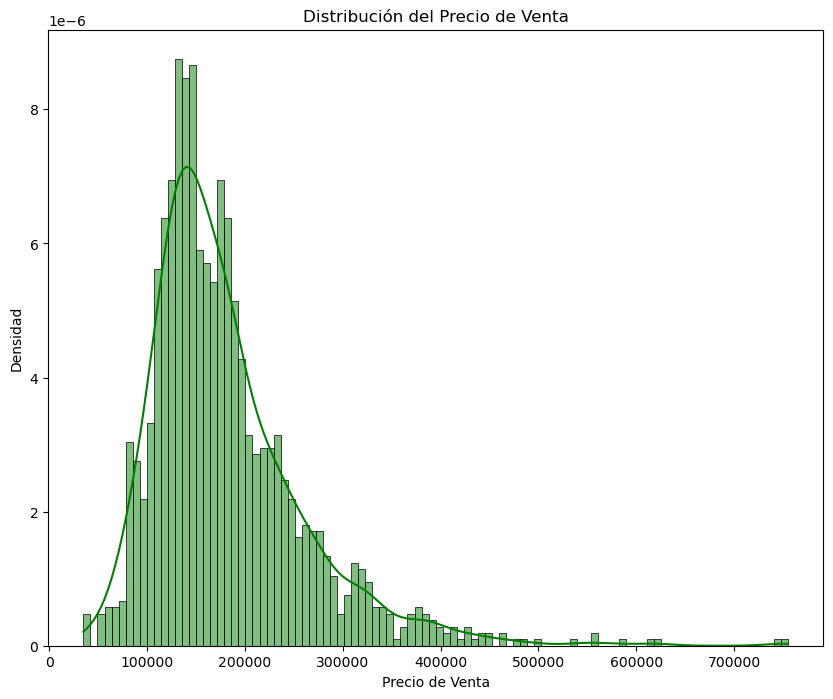

In [38]:
# Imprime estadísticas descriptivas de la columna 'SalePrice'
print("Estadísticas descriptivas de 'SalePrice':\n", df_train['SalePrice'].describe())

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica la distribución de 'SalePrice'
sns.histplot(df_train['SalePrice'], color='green', bins=100, kde=True, stat='density')

# Añade título y etiquetas a los ejes
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Densidad')

# Muestra la gráfica
plt.show()


Cantidad de columnas por tipo de datos:
 object     43
int64      34
float64     3
dtype: int64


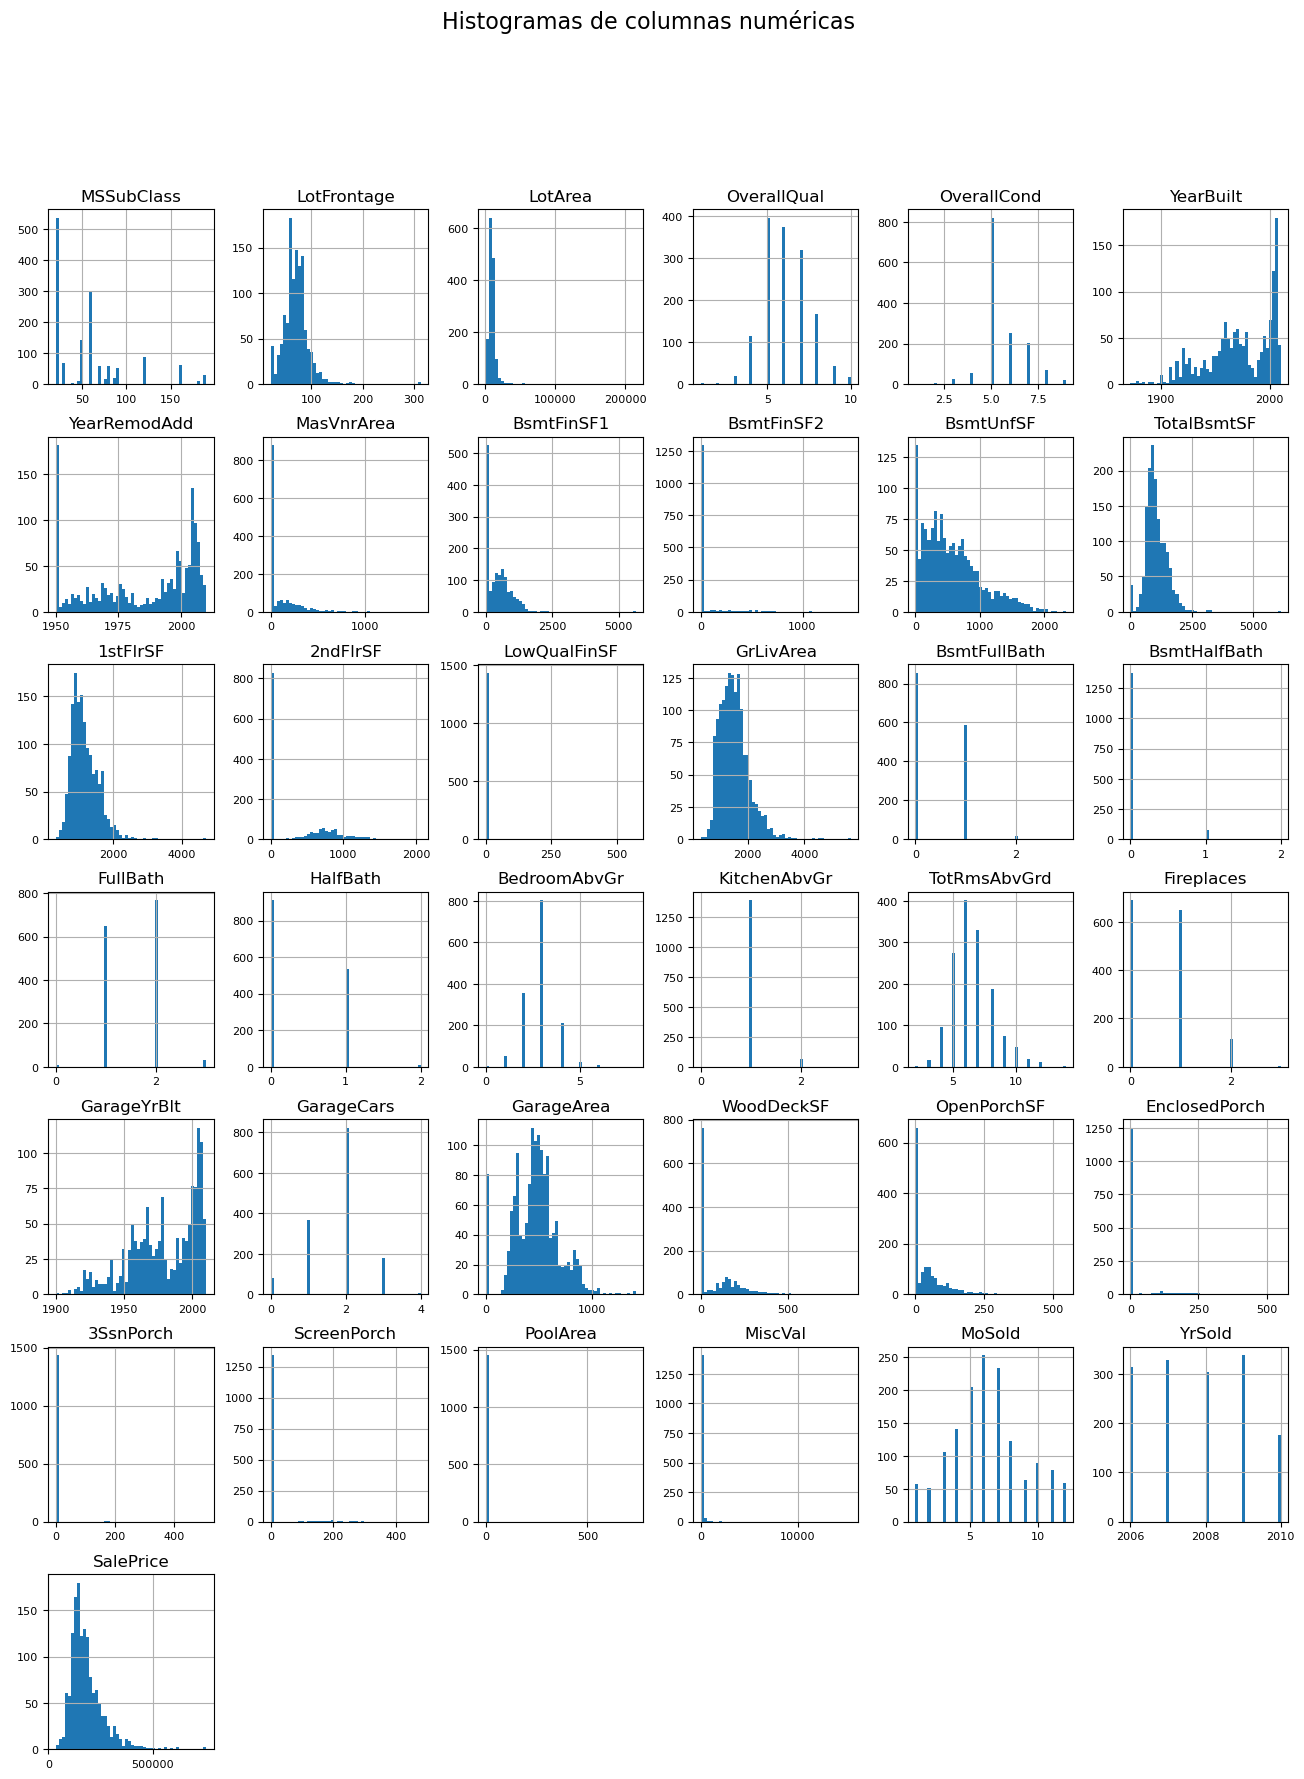

In [39]:
# Contar el número de columnas de cada tipo de datos
count_by_type = df_train.dtypes.value_counts()

# Imprimir el resultado
print("Cantidad de columnas por tipo de datos:\n",count_by_type)

# Filtrar las columnas numéricas
df_num = df_train.select_dtypes(include=['float64', 'int64'])

# Crear histogramas para las columnas numéricas
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Añadir títulos y etiquetas
plt.suptitle("Histogramas de columnas numéricas", fontsize=16)
plt.show()


Matriz de correlación:
               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0

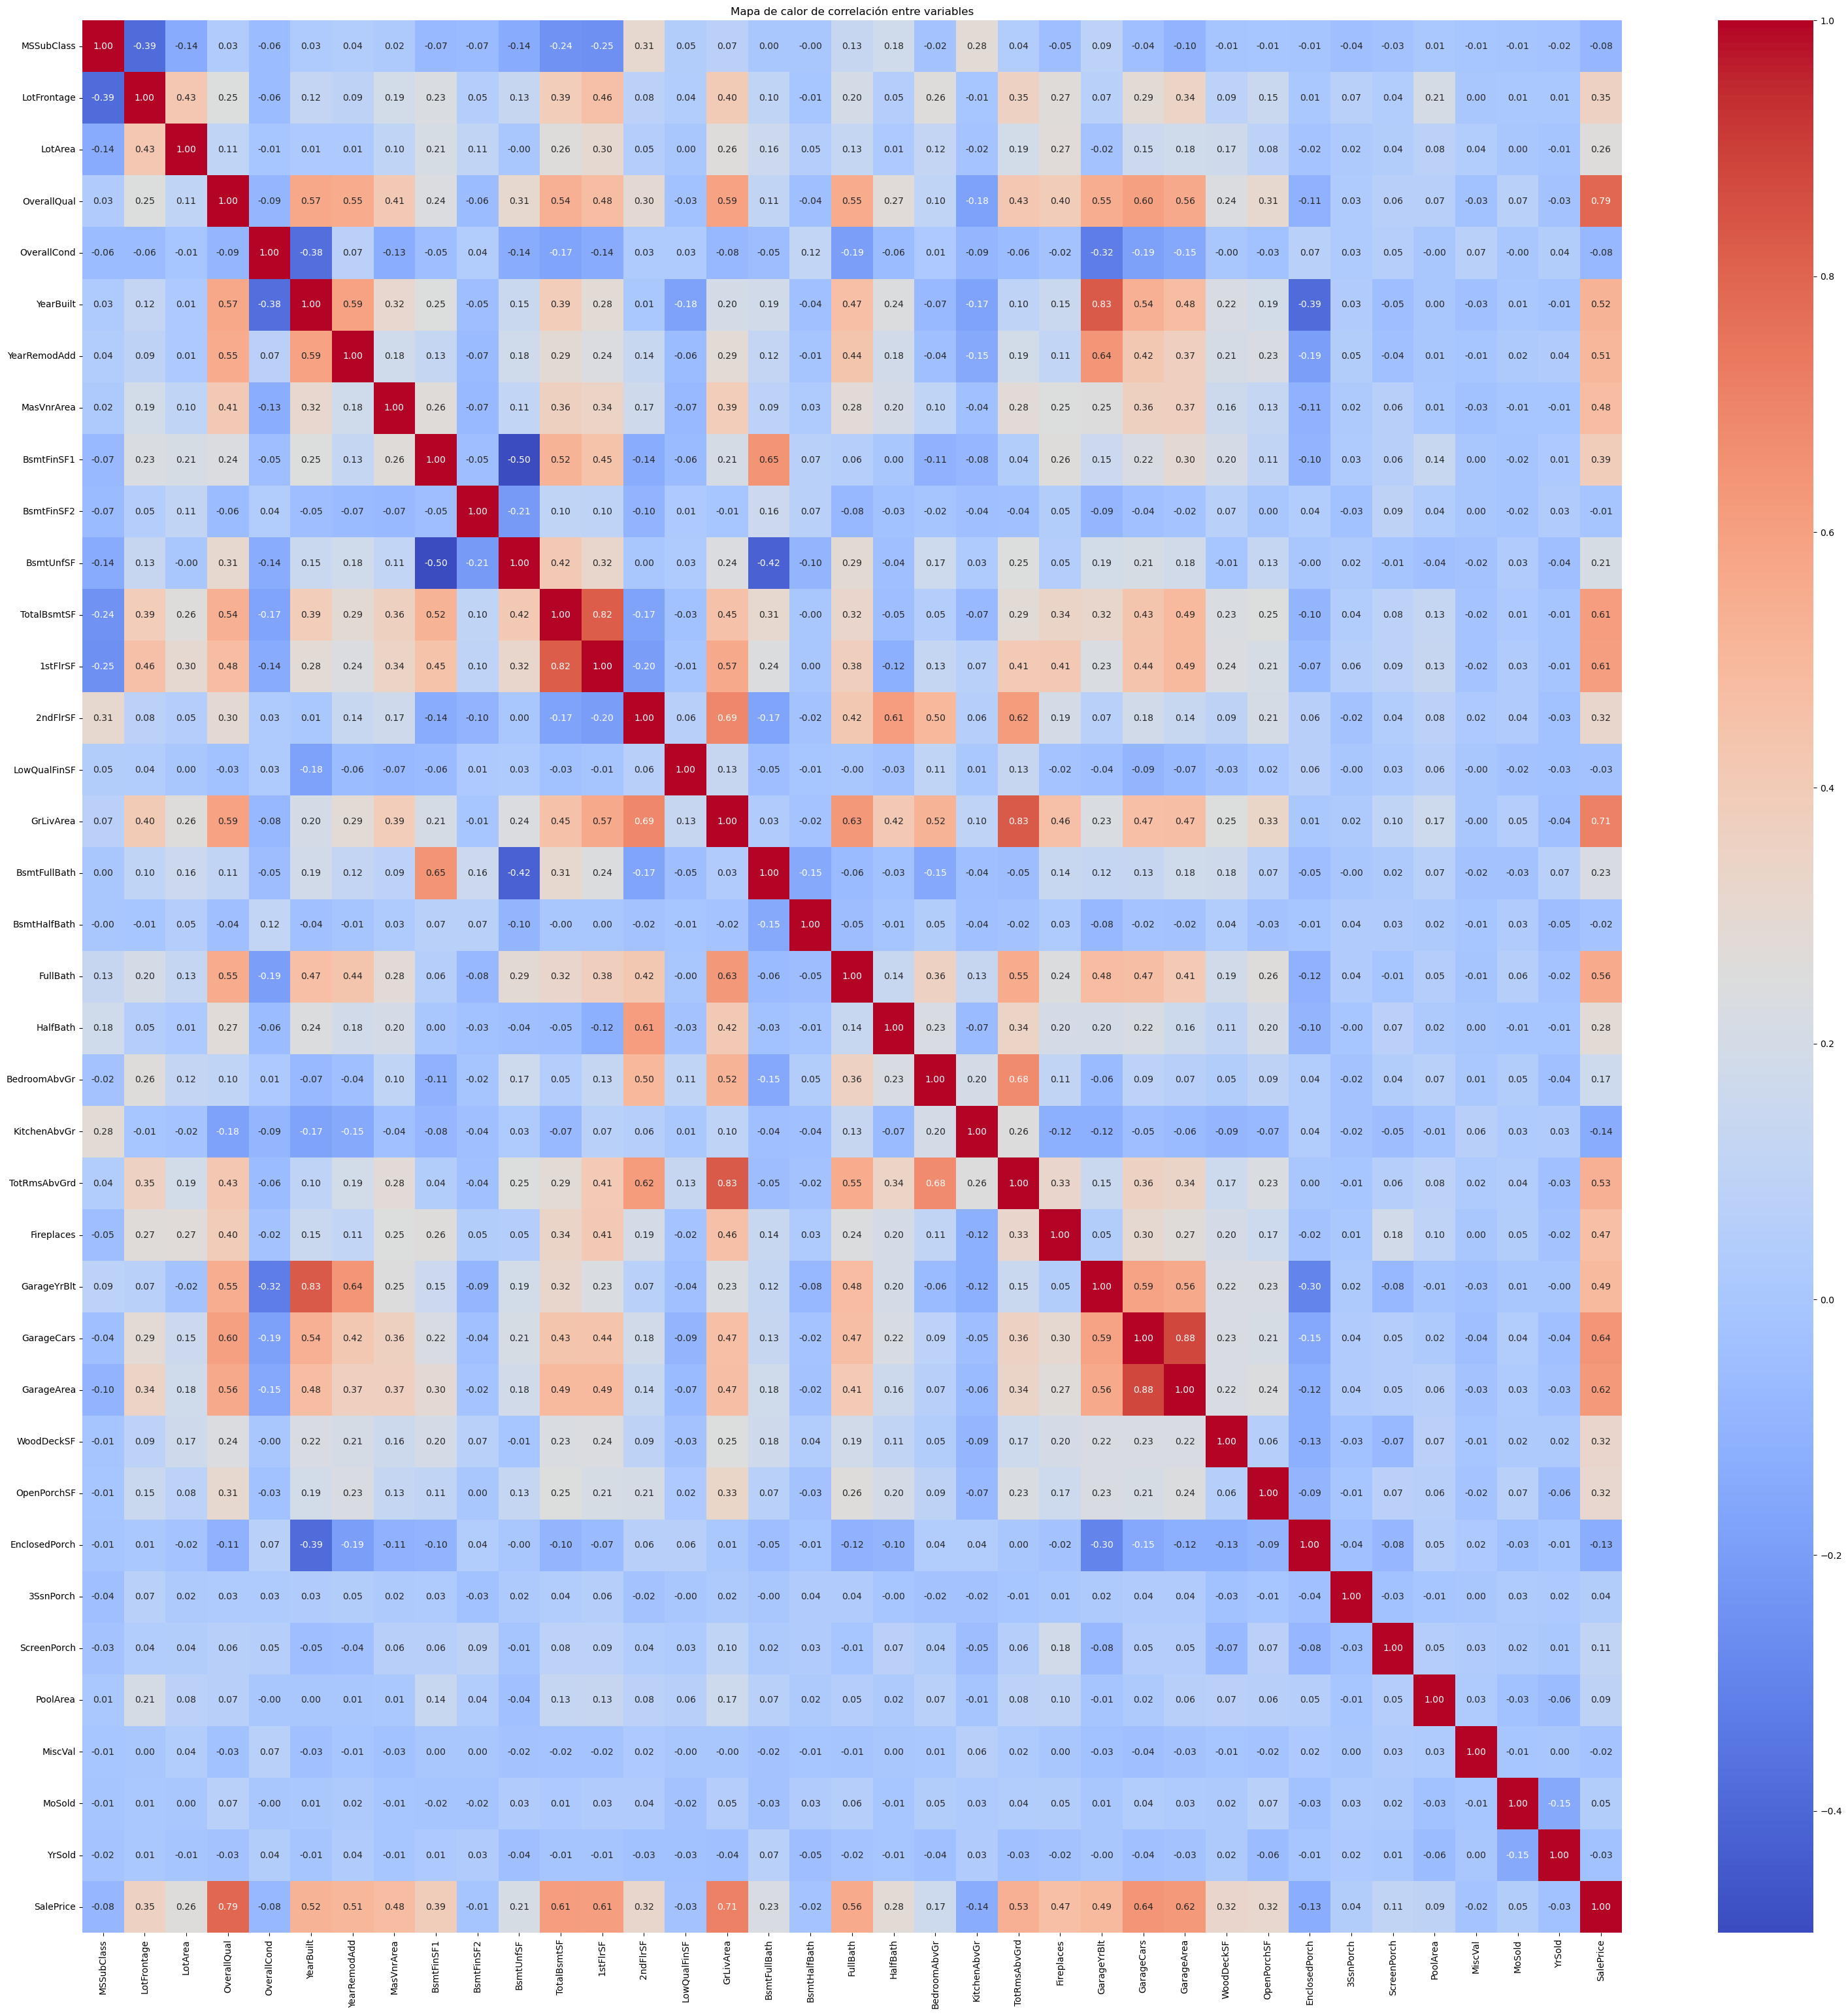

In [40]:
# Calcular la matriz de correlación
correlation_matrix = df_num.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un mapa de calor (heatmap)
plt.figure(figsize=(38, 38))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación entre variables")
plt.show()

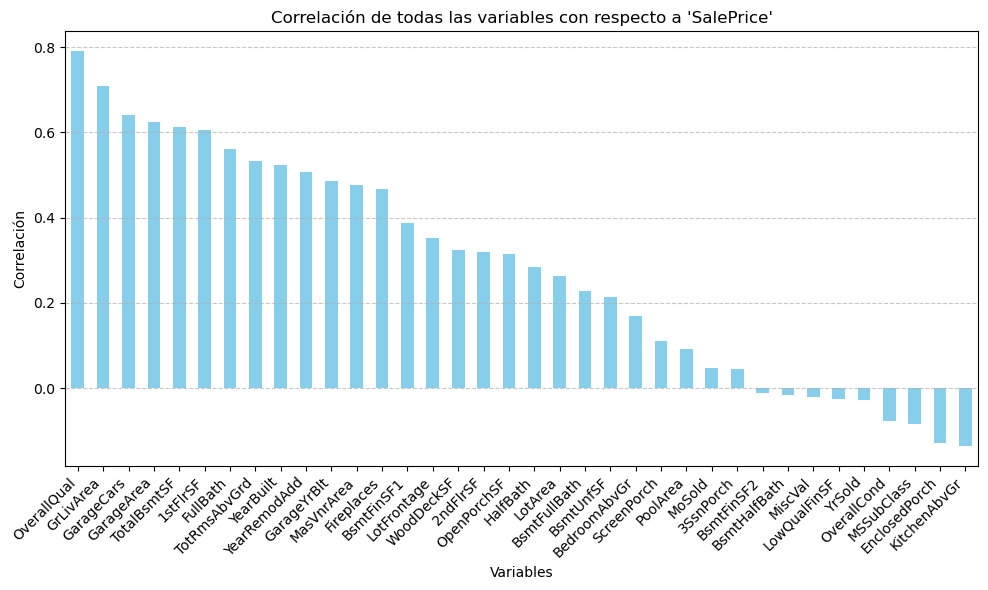

In [50]:
# Calcular la matriz de correlación excluyendo 'SalePrice'
correlation_except_saleprice = df_train.drop(columns=['SalePrice']).corrwith(df_train['SalePrice']).sort_values(ascending=False)

# Visualizar la correlación utilizando un gráfico de líneas
plt.figure(figsize=(10, 6))
correlation_except_saleprice.plot(kind='bar', color='skyblue')
plt.title("Correlación de todas las variables con respecto a 'SalePrice'")
plt.xlabel("Variables")
plt.ylabel("Correlación")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
